In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Setup complete!")

✅ Setup complete!


In [3]:
# Connect to DuckDB (in-memory)
conn = duckdb.connect()

# Load our datasets (go up one folder with ../)
conn.execute("""
    CREATE TABLE heart AS 
    SELECT * FROM read_csv_auto('../data/raw/tabular/heart_disease_uci.csv')
""")

conn.execute("""
    CREATE TABLE diabetes AS 
    SELECT * FROM read_csv_auto('../data/raw/tabular/diabetes_prediction_dataset.csv')
""")

print("✅ Tables loaded!")

✅ Tables loaded!


In [4]:
conn.execute("SHOW TABLES").fetchdf()

,name
0,diabetes
1,heart


In [5]:
# First 5 rows of heart table
conn.execute("SELECT * FROM heart LIMIT 5").fetchdf()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


In [6]:
# Row count
print("Heart table rows:")
print(conn.execute("SELECT COUNT(*) as total FROM heart").fetchdf())

print("\n" + "="*50 + "\n")

# Column info
print("Heart table columns:")
print(conn.execute("DESCRIBE heart").fetchdf())

Heart table rows:
   total
0    920


Heart table columns:
   column_name column_type null   key default extra
0           id      BIGINT  YES  None    None  None
1          age      BIGINT  YES  None    None  None
2          sex     VARCHAR  YES  None    None  None
3      dataset     VARCHAR  YES  None    None  None
4           cp     VARCHAR  YES  None    None  None
5     trestbps      BIGINT  YES  None    None  None
6         chol      BIGINT  YES  None    None  None
7          fbs     BOOLEAN  YES  None    None  None
8      restecg     VARCHAR  YES  None    None  None
9       thalch      BIGINT  YES  None    None  None
10       exang     BOOLEAN  YES  None    None  None
11     oldpeak      DOUBLE  YES  None    None  None
12       slope     VARCHAR  YES  None    None  None
13          ca      BIGINT  YES  None    None  None
14        thal     VARCHAR  YES  None    None  None
15         num      BIGINT  YES  None    None  None


In [7]:
# First 5 rows of diabetes table
print("Diabetes table - first 5 rows:")
print(conn.execute("SELECT * FROM diabetes LIMIT 5").fetchdf())

print("\n" + "="*50 + "\n")

# Row count
print("Diabetes table rows:")
print(conn.execute("SELECT COUNT(*) as total FROM diabetes").fetchdf())

print("\n" + "="*50 + "\n")

# Column info
print("Diabetes table columns:")
print(conn.execute("DESCRIBE diabetes").fetchdf())

Diabetes table - first 5 rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


Diabetes table rows:
    total
0  100000


Diabetes table columns:
           column_name column_type null   key default extra
0               gender     VARCHAR  YES  None    None  None
1                  age      DOUBLE  YES  None    None  None
2    

In [8]:
# Query 1: Select specific columns
conn.execute("""
    SELECT age, sex, chest_pain_type, cholesterol
    FROM heart
    LIMIT 10
""").fetchdf()


BinderException: Binder Error: Referenced column "chest_pain_type" not found in FROM clause!
Candidate bindings: "cp", "ca", "exang", "thalch", "dataset"

LINE 2:     SELECT age, sex, chest_pain_type, cholesterol
                             ^

In [9]:
# See actual column names
conn.execute("DESCRIBE heart").fetchdf()


,column_name,column_type,null,key,default,extra
0,id,BIGINT,YES,None,None,None
1,age,BIGINT,YES,None,None,None
2,sex,VARCHAR,YES,None,None,None
3,dataset,VARCHAR,YES,None,None,None
4,cp,VARCHAR,YES,None,None,None
5,trestbps,BIGINT,YES,None,None,None
6,chol,BIGINT,YES,None,None,None
7,fbs,BOOLEAN,YES,None,None,None
8,restecg,VARCHAR,YES,None,None,None
9,thalch,BIGINT,YES,None,None,None


In [10]:
# Query 1: Select specific columns
conn.execute("""
    SELECT age, sex, cp, chol
    FROM heart
    LIMIT 10
""").fetchdf()

,age,sex,cp,chol
0,63,Male,typical angina,233
1,67,Male,asymptomatic,286
2,67,Male,asymptomatic,229
3,37,Male,non-anginal,250
4,41,Female,atypical angina,204
5,56,Male,atypical angina,236
6,62,Female,asymptomatic,268
7,57,Female,asymptomatic,354
8,63,Male,asymptomatic,254
9,53,Male,asymptomatic,203


In [11]:
# Query 2: Patients older than 60
conn.execute("""
    SELECT age, sex, chol, num
    FROM heart
    WHERE age > 60
""").fetchdf()

,age,sex,chol,num
0,63,Male,233,0
1,67,Male,286,2
2,67,Male,229,1
3,62,Female,268,3
4,63,Male,254,2
...,...,...,...,...
216,68,Male,254,0
217,62,Male,254,4
218,62,Male,170,1
219,62,Male,139,0


In [12]:
# Query 3: Basic statistics
conn.execute("""
    SELECT 
        COUNT(*) as total_patients,
        AVG(age) as avg_age,
        MIN(age) as min_age,
        MAX(age) as max_age,
        AVG(chol) as avg_cholesterol
    FROM heart
""").fetchdf()

,total_patients,avg_age,min_age,max_age,avg_cholesterol
0,920,53.51087,28,77,199.130337


In [13]:
# Query 4: Count patients by sex
conn.execute("""
    SELECT 
        sex,
        COUNT(*) as count,
        AVG(age) as avg_age,
        AVG(chol) as avg_cholesterol
    FROM heart
    GROUP BY sex
""").fetchdf()

,sex,count,avg_age,avg_cholesterol
0,Female,194,52.474227,241.481283
1,Male,726,53.787879,187.864865


In [14]:
# See all unique values in sex column
conn.execute("""
    SELECT sex, COUNT(*) as count
    FROM heart
    GROUP BY sex
    ORDER BY count DESC
""").fetchdf()

,sex,count
0,Male,726
1,Female,194


In [15]:
# Query 5: Find age groups with more than 50 patients
conn.execute("""
    SELECT 
        age,
        COUNT(*) as patient_count
    FROM heart
    GROUP BY age
    HAVING COUNT(*) > 50
    ORDER BY patient_count DESC
""").fetchdf()

,age,patient_count
0,54,51


In [16]:
# Query 6: Categorize patients by age group
conn.execute("""
    SELECT 
        CASE 
            WHEN age < 40 THEN 'Young'
            WHEN age BETWEEN 40 AND 60 THEN 'Middle'
            ELSE 'Senior'
        END as age_group,
        COUNT(*) as count,
        AVG(chol) as avg_cholesterol
    FROM heart
    GROUP BY age_group
    ORDER BY count DESC
""").fetchdf()

,age_group,count,avg_cholesterol
0,Middle,619,204.973199
1,Senior,221,181.972350
2,Young,80,202.223684


In [17]:
# Query 7: Rank patients by cholesterol within each sex
conn.execute("""
    SELECT 
        age,
        sex,
        chol,
        ROW_NUMBER() OVER (PARTITION BY sex ORDER BY chol DESC) as chol_rank
    FROM heart
    LIMIT 20
""").fetchdf()

,age,sex,chol,chol_rank
0,67,Female,564,1
1,53,Female,468,2
2,65,Female,417,3
3,56,Female,409,4
4,63,Female,407,5
5,62,Female,394,6
6,55,Female,394,7
7,58,Female,393,8
8,40,Female,392,9
9,65,Female,360,10


In [18]:
# Query 8: Compare each patient's cholesterol with the previous patient
conn.execute("""
    SELECT 
        age,
        chol,
        LAG(chol, 1) OVER (ORDER BY age) as prev_chol
    FROM heart
    LIMIT 15
""").fetchdf()

,age,chol,prev_chol
0,28,132,<NA>
1,29,204,132
2,29,243,204
3,29,<NA>,243
4,30,237,<NA>
5,31,219,237
6,31,270,219
7,32,198,270
8,32,225,198
9,32,254,225


In [19]:
# Query 9: How much did cholesterol change from previous patient?
conn.execute("""
    SELECT 
        age,
        chol,
        LAG(chol, 1) OVER (ORDER BY age) as prev_chol,
        chol - LAG(chol, 1) OVER (ORDER BY age) as chol_change
    FROM heart
    LIMIT 15
""").fetchdf()

,age,chol,prev_chol,chol_change
0,28,132,<NA>,<NA>
1,29,204,132,72
2,29,243,204,39
3,29,<NA>,243,<NA>
4,30,237,<NA>,<NA>
5,31,219,237,-18
6,31,270,219,51
7,32,198,270,-72
8,32,225,198,27
9,32,254,225,29


In [20]:
# Query 10: Average cholesterol for each age group (running average)
conn.execute("""
    SELECT 
        age,
        chol,
        AVG(chol) OVER (ORDER BY age ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) as rolling_avg_3
    FROM heart
    LIMIT 15
""").fetchdf()

,age,chol,rolling_avg_3
0,28,132,132.000000
1,29,204,168.000000
2,29,243,193.000000
3,29,<NA>,223.500000
4,30,237,240.000000
5,31,219,228.000000
6,31,270,242.000000
7,32,198,229.000000
8,32,225,231.000000
9,32,254,225.666667


In [21]:
conn.execute("""
    WITH age_groups AS (
        SELECT 
            *,
            CASE 
                WHEN age < 40 THEN 'Young'
                WHEN age BETWEEN 40 AND 60 THEN 'Middle'
                ELSE 'Senior'
            END as age_group
        FROM heart
    )
    SELECT 
        age_group,
        COUNT(*) as patient_count,
        AVG(chol) as avg_cholesterol,
        AVG(trestbps) as avg_blood_pressure
    FROM age_groups
    GROUP BY age_group
""").fetchdf()

,age_group,patient_count,avg_cholesterol,avg_blood_pressure
0,Middle,619,204.973199,131.370558
1,Young,80,202.223684,123.948718
2,Senior,221,181.972350,137.802083


In [2]:
# Query 12: Handle missing values
conn.execute("""
    SELECT 
        age,
        chol,
        COALESCE(chol, 0) as chol_clean
    FROM heart
    LIMIT 10
""").fetchdf()


NameError: name 'conn' is not defined

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Display settings
pd.set_option('display.max_columns', None)

print("✅ Setup complete!")

✅ Setup complete!


In [4]:

# Connect to DuckDB (in-memory)
conn = duckdb.connect()

# Load our datasets
conn.execute("""
    CREATE TABLE heart AS 
    SELECT * FROM read_csv_auto('../data/raw/tabular/heart_disease_uci.csv')
""")

conn.execute("""
    CREATE TABLE diabetes AS 
    SELECT * FROM read_csv_auto('../data/raw/tabular/diabetes_prediction_dataset.csv')
""")

print("✅ Tables loaded!")

✅ Tables loaded!


In [5]:
# Query 12: Handle missing values
conn.execute("""
    SELECT 
        age,
        chol,
        COALESCE(chol, 0) as chol_clean
    FROM heart
    LIMIT 10
""").fetchdf()

,age,chol,chol_clean
0,63,233,233
1,67,286,286
2,67,229,229
3,37,250,250
4,41,204,204
5,56,236,236
6,62,268,268
7,57,354,354
8,63,254,254
9,53,203,203


In [7]:
#query 13 : subquery
conn.execute("""
select age ,
       sex,
       chol,
       FROM heart 
       WHERE chol>( SELECT AVG(chol) FROM heart)
       LIMIT 15 """).fetchdf()

,age,sex,chol
0,63,Male,233
1,67,Male,286
2,67,Male,229
3,37,Male,250
4,41,Female,204
5,56,Male,236
6,62,Female,268
7,57,Female,354
8,63,Male,254
9,53,Male,203


In [11]:
#query 14 : subquery in select 
conn.execute (""" 
SELECT age ,
       chol,
       ( SELECT AVG(chol) FROM heart ) as avg_chol,
       chol - ( SELECT AVG(chol) FROM heart ) as diff_in_avg
       FROM heart
       LIMIT 10 """) .fetchdf()
       

,age,chol,avg_chol,diff_in_avg
0,63,233,199.130337,33.869663
1,67,286,199.130337,86.869663
2,67,229,199.130337,29.869663
3,37,250,199.130337,50.869663
4,41,204,199.130337,4.869663
5,56,236,199.130337,36.869663
6,62,268,199.130337,68.869663
7,57,354,199.130337,154.869663
8,63,254,199.130337,54.869663
9,53,203,199.130337,3.869663


In [14]:
#query 15 : JOIN ( COMBINING 2 TABLES )
conn.execute (""" 
CREATE Table  sex_lookup AS
SELECT * FROM (
VALUES 
('Male', 'M', 'Higher heart risk'),
            ('Female', 'F', 'Lower heart risk'),
            ('0', 'F', 'Lower heart risk'),
            ('1', 'M', 'Higher heart risk')
) AS t (sex,code,risk_note)""").fetchdf()


CatalogException: Catalog Error: Table with name "sex_lookup" already exists!

In [15]:
# Check the lookup table
conn.execute("SELECT * FROM sex_lookup").fetchdf()

,sex,code,risk_note
0,Male,M,Higher heart risk
1,Female,F,Lower heart risk
2,0,F,Lower heart risk
3,1,M,Higher heart risk


In [16]:
#query 16: practicing inner join 
conn.execute("""
    SELECT h.age ,
          h.sex,
          h.chol,
          s.code,
          s.risk_note   FROM heart h
          INNER JOIN sex_lookup s ON h.sex=s.sex LIMIT 15
""").fetchdf()
          
          
    

,age,sex,chol,code,risk_note
0,63,Male,233,M,Higher heart risk
1,67,Male,286,M,Higher heart risk
2,67,Male,229,M,Higher heart risk
3,37,Male,250,M,Higher heart risk
4,41,Female,204,F,Lower heart risk
5,56,Male,236,M,Higher heart risk
6,62,Female,268,F,Lower heart risk
7,57,Female,354,F,Lower heart risk
8,63,Male,254,M,Higher heart risk
9,53,Male,203,M,Higher heart risk


In [18]:
#query 17 left join 
conn.execute("""
    SELECT 
        h.age,
        h.sex,
        h.chol,              
        s.code,
        s.risk_note
    FROM heart h 
    LEFT JOIN sex_lookup s ON h.sex = s.sex 
        LIMIT 15
""").fetchdf()


,age,sex,chol,code,risk_note
0,63,Male,233,M,Higher heart risk
1,67,Male,286,M,Higher heart risk
2,67,Male,229,M,Higher heart risk
3,37,Male,250,M,Higher heart risk
4,41,Female,204,F,Lower heart risk
5,56,Male,236,M,Higher heart risk
6,62,Female,268,F,Lower heart risk
7,57,Female,354,F,Lower heart risk
8,63,Male,254,M,Higher heart risk
9,53,Male,203,M,Higher heart risk


In [19]:
#QUERY 18 : LEAD()
conn.execute("""
    SELECT 
        age,
        chol,
        LEAD(chol, 1) OVER (ORDER BY age) as next_chol
    FROM heart
    LIMIT 15
""").fetchdf()


,age,chol,next_chol
0,28,132,204
1,29,204,243
2,29,243,<NA>
3,29,<NA>,237
4,30,237,219
5,31,219,270
6,31,270,198
7,32,198,225
8,32,225,254
9,32,254,529


In [23]:
#QUERY 19 : RANK() vs DENSE_RANK()

conn.execute("""
    SELECT 
        age,
        chol,
        RANK() OVER (ORDER BY chol DESC ) AS rank ,
        DENSE_RANK() OVER (ORDER BY chol DESC) AS dense_rank ,
        ROW_NUMBER() OVER (ORDER BY chol DESC ) AS row_number 
        FROM heart
    LIMIT 15
""").fetchdf()

        
        

,age,chol,rank,dense_rank,row_number
0,54,603,1,1,1
1,67,564,2,2,2
2,32,529,3,3,3
3,53,518,4,4,4
4,44,491,5,5,5
5,53,468,6,6,6
6,40,466,7,7,7
7,58,458,8,8,8
8,65,417,9,9,9
9,44,412,10,10,10


In [25]:
# Query 19: Find percentiles for cholesterol
conn.execute("""
    SELECT 
        age,
        chol,
        PERCENT_RANK () OVER (ORDER BY chol) as percentile 
        FROM heart
        WHERE chol>0
    LIMIT 15
""").fetchdf()

,age,chol,percentile
0,56,85,0.000000
1,52,100,0.001395
2,56,100,0.001395
3,38,117,0.004184
4,57,126,0.005579
5,50,129,0.006974
6,57,131,0.008368
7,28,132,0.009763
8,62,139,0.011158
9,44,141,0.012552


In [27]:
# Query 20: self joins 
conn.execute("""
    SELECT 
        a.age as patient_age,
        a.chol as patient_chol,
        b.age as other_patient_age,
        b.chol as other_patient_chol

        FROM heart a 
        JOIN heart b ON a.sex=b.sex AND a.id != b.id
        WHERE a.chol >0 and b.chol> 0
        LIMIT 15
""").fetchdf()

    

,patient_age,patient_chol,other_patient_age,other_patient_chol
0,63,233,62,254
1,67,286,62,254
2,67,229,62,254
3,37,250,62,254
4,41,204,54,333
5,56,236,62,254
6,62,268,54,333
7,57,354,54,333
8,63,254,62,254
9,53,203,62,254


In [28]:
# Query 21: Combine high cholesterol and high blood pressure patients
conn.execute("""
    SELECT age, chol, 'High Cholesterol' as risk_type
    FROM heart
    WHERE chol > 300
    
    UNION
    
    SELECT age, chol, 'High Blood Pressure' as risk_type
    FROM heart
    WHERE trestbps > 140
    
    LIMIT 15
""").fetchdf()

,age,chol,risk_type
0,55,327,High Cholesterol
1,51,303,High Cholesterol
2,71,302,High Blood Pressure
3,58,218,High Blood Pressure
4,39,147,High Blood Pressure
5,43,<NA>,High Blood Pressure
6,54,195,High Blood Pressure
7,61,241,High Blood Pressure
8,63,330,High Cholesterol
9,45,308,High Cholesterol


In [29]:
#query 22 : IN
conn.execute("""
SELECT age,chol,sex 
FROM heart 
WHERE sex IN (SELECT sex FROM sex_lookup WHERE code= 'M')
LIMIT 10
""").fetchdf()

,age,chol,sex
0,63,233,Male
1,67,286,Male
2,67,229,Male
3,37,250,Male
4,56,236,Male
5,63,254,Male
6,53,203,Male
7,57,192,Male
8,56,256,Male
9,44,263,Male


In [35]:
# Query 22b: Using EXISTS
conn.execute("""
    SELECT age, chol, sex
    FROM heart h
    WHERE EXISTS (
        SELECT 1 FROM sex_lookup s 
        WHERE s.sex = h.sex AND s.code = 'M'
    )
    LIMIT 10
""").fetchdf()

,age,chol,sex
0,63,233,Male
1,67,286,Male
2,67,229,Male
3,37,250,Male
4,56,236,Male
5,63,254,Male
6,53,203,Male
7,57,192,Male
8,56,256,Male
9,44,263,Male


In [36]:
# Check if connection exists
try:
    conn.execute("SELECT 1").fetchdf()
    print("✅ Connection ready!")
except:
    print("❌ Need to reconnect")

✅ Connection ready!


In [37]:
# Load tables into pandas DataFrames
heart_df = conn.execute("SELECT * FROM heart").fetchdf()
diabetes_df = conn.execute("SELECT * FROM diabetes").fetchdf()

print(f"Heart dataset: {heart_df.shape[0]} rows, {heart_df.shape[1]} columns")
print(f"Diabetes dataset: {diabetes_df.shape[0]} rows, {diabetes_df.shape[1]} columns")

Heart dataset: 920 rows, 16 columns
Diabetes dataset: 100000 rows, 9 columns


In [38]:
# First 5 rows of heart data
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


In [39]:
# Data types and missing values
print("=== Heart Dataset Info ===")
print(heart_df.info())

=== Heart Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    Int64  
 6   chol      890 non-null    Int64  
 7   fbs       830 non-null    boolean
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    Int64  
 10  exang     865 non-null    boolean
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    Int64  
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: Int64(4), boolean(2), float64(1), int64(3), object(6)
memory usage: 107.9+ KB
None


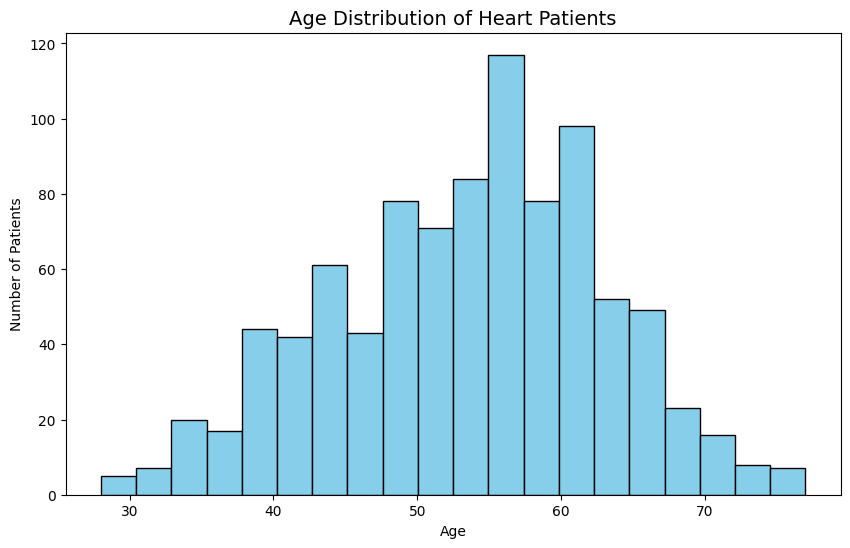

In [40]:
# Age distribution of patients
plt.figure(figsize=(10, 6))
plt.hist(heart_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Heart Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

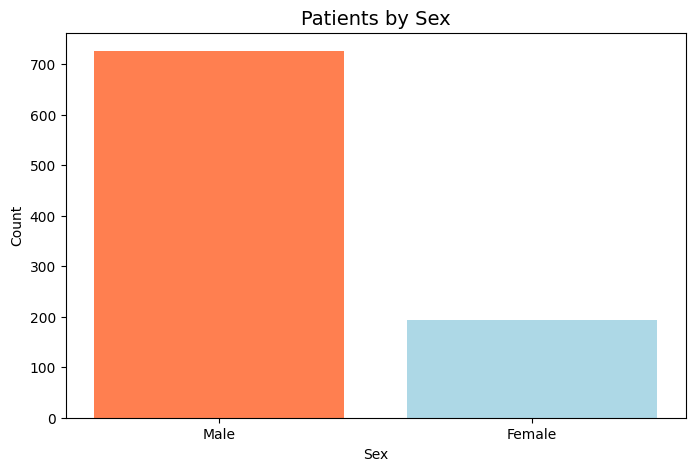

sex
Male      726
Female    194
Name: count, dtype: int64


In [41]:
# Count of patients by sex
plt.figure(figsize=(8, 5))
sex_counts = heart_df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values, color=['coral', 'lightblue', 'green', 'orange'])
plt.title('Patients by Sex', fontsize=14)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

print(sex_counts)

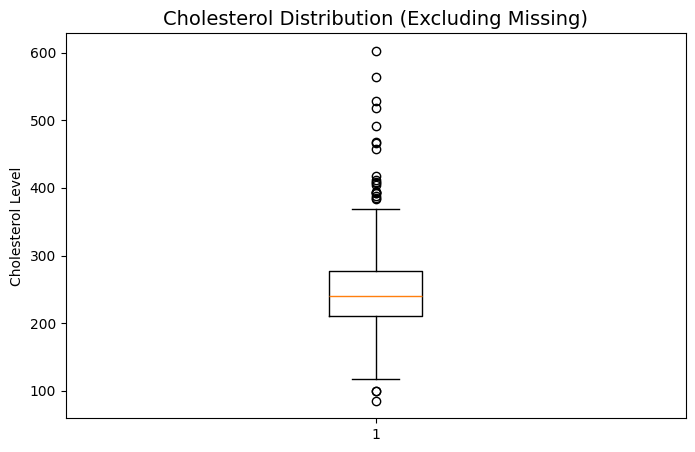

Min: 85
Max: 603
Average: 246.8


In [42]:
# Cholesterol distribution - Box Plot
plt.figure(figsize=(8, 5))
# Filter out 0 values (missing data)
chol_clean = heart_df[heart_df['chol'] > 0]['chol']
plt.boxplot(chol_clean)
plt.title('Cholesterol Distribution (Excluding Missing)', fontsize=14)
plt.ylabel('Cholesterol Level')
plt.show()

print(f"Min: {chol_clean.min()}")
print(f"Max: {chol_clean.max()}")
print(f"Average: {chol_clean.mean():.1f}")

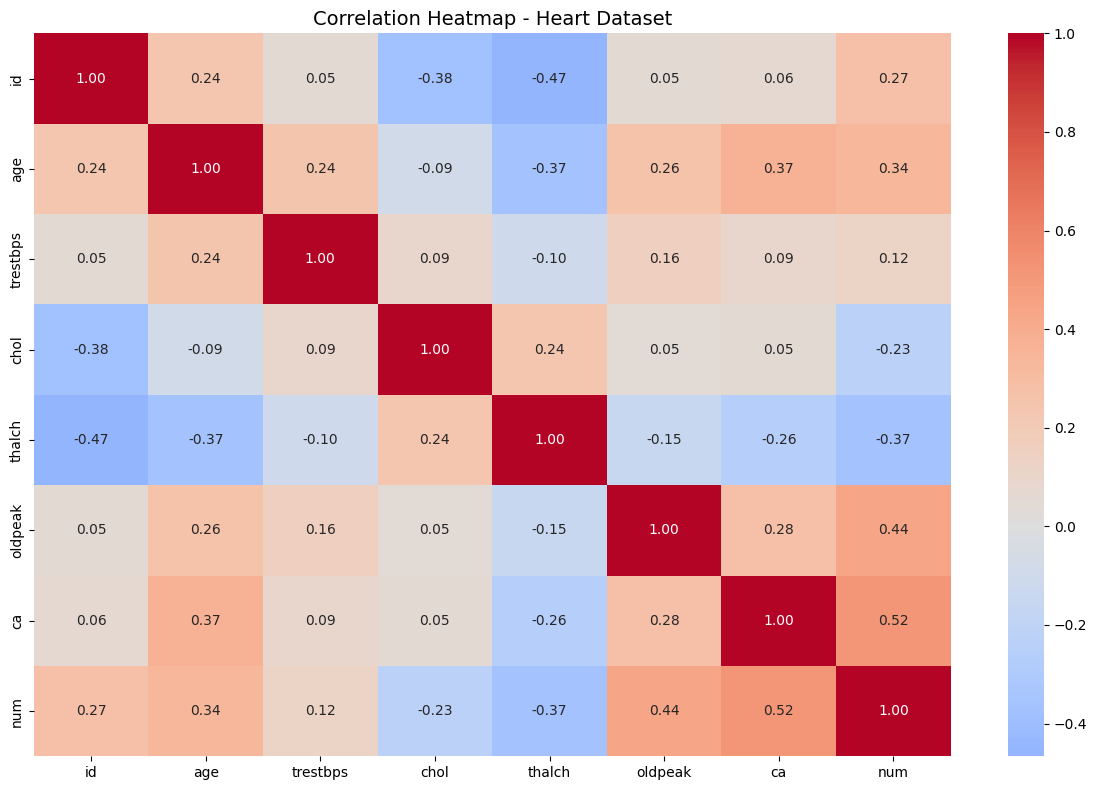

In [43]:
# Correlation between numeric columns
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_cols = heart_df.select_dtypes(include=[np.number]).columns
correlation = heart_df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Heart Dataset', fontsize=14)
plt.tight_layout()
plt.show()

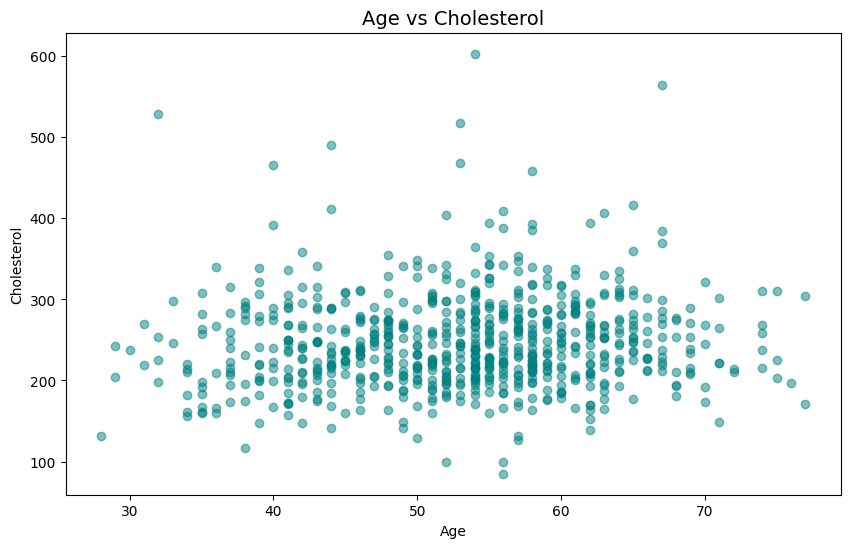

In [44]:
# Age vs Cholesterol relationship
plt.figure(figsize=(10, 6))

# Filter out missing cholesterol values
heart_clean = heart_df[heart_df['chol'] > 0]

plt.scatter(heart_clean['age'], heart_clean['chol'], alpha=0.5, color='teal')
plt.title('Age vs Cholesterol', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

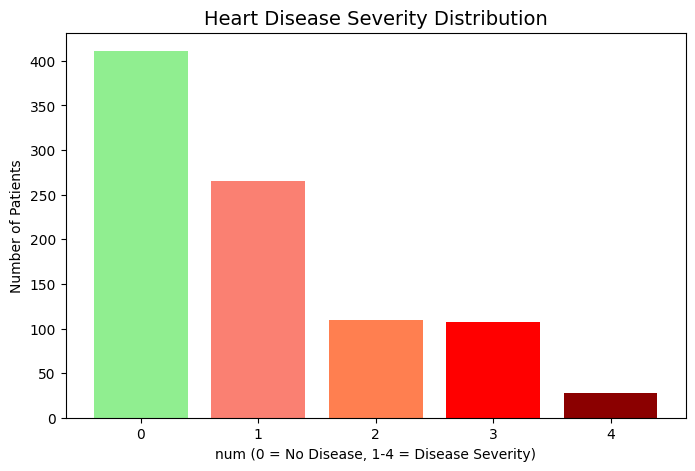

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [45]:
# Distribution of target variable (heart disease)
plt.figure(figsize=(8, 5))

target_counts = heart_df['num'].value_counts().sort_index()
colors = ['lightgreen', 'salmon', 'coral', 'red', 'darkred']

plt.bar(target_counts.index, target_counts.values, color=colors[:len(target_counts)])
plt.title('Heart Disease Severity Distribution', fontsize=14)
plt.xlabel('num (0 = No Disease, 1-4 = Disease Severity)')
plt.ylabel('Number of Patients')
plt.show()

print(target_counts)

In [46]:
# First look at diabetes data
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
# Check diabetes columns and types
print("=== Diabetes Dataset Info ===")
print(f"Shape: {diabetes_df.shape}")
print(f"\nColumns: {diabetes_df.columns.tolist()}")
print(f"\nData types:\n{diabetes_df.dtypes}")

=== Diabetes Dataset Info ===
Shape: (100000, 9)

Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Data types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


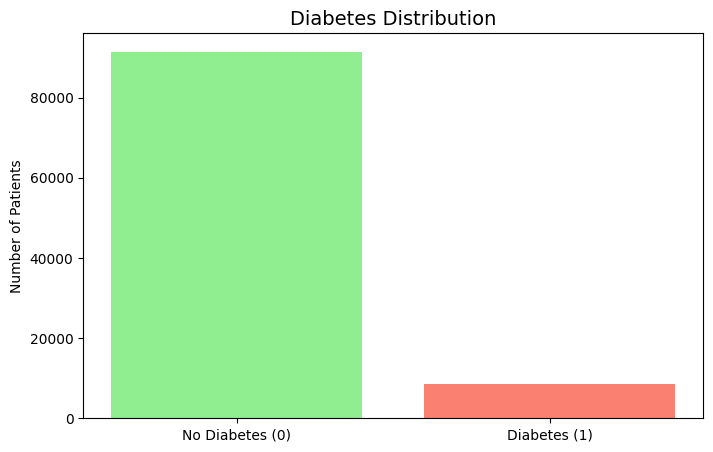

diabetes
0    91500
1     8500
Name: count, dtype: int64

Diabetes Rate: 8.5%


In [48]:
# Distribution of diabetes (target variable)
plt.figure(figsize=(8, 5))

diabetes_counts = diabetes_df['diabetes'].value_counts()
plt.bar(['No Diabetes (0)', 'Diabetes (1)'], diabetes_counts.values, color=['lightgreen', 'salmon'])
plt.title('Diabetes Distribution', fontsize=14)
plt.ylabel('Number of Patients')
plt.show()

print(diabetes_counts)
print(f"\nDiabetes Rate: {diabetes_counts[1] / len(diabetes_df) * 100:.1f}%")

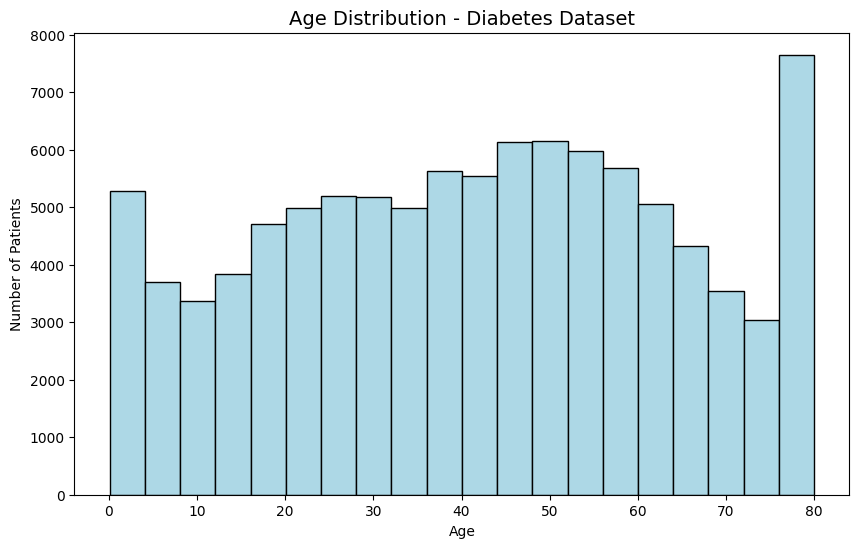

In [49]:
# Age distribution in diabetes dataset
plt.figure(figsize=(10, 6))
plt.hist(diabetes_df['age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution - Diabetes Dataset', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

/var/folders/vc/5pm4h46d0b95xndmztjnr2fc0000gn/T/ipykernel_8293/240487296.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_diabetes, has_diabetes], labels=['No Diabetes', 'Has Diabetes'])


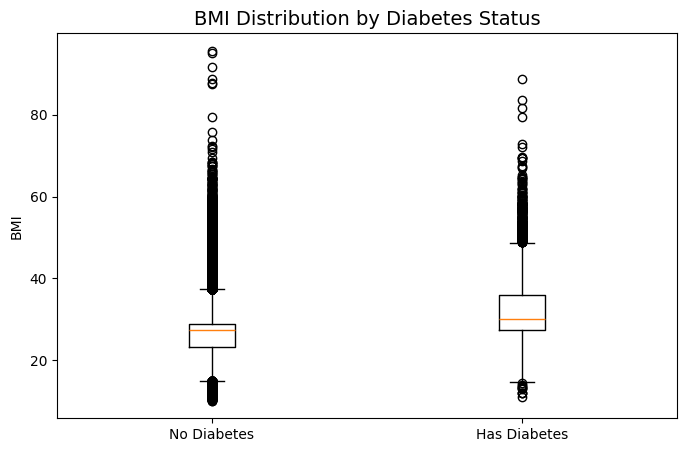

No Diabetes - Avg BMI: 26.9
Has Diabetes - Avg BMI: 32.0


In [50]:
# BMI distribution by diabetes status
plt.figure(figsize=(8, 5))

no_diabetes = diabetes_df[diabetes_df['diabetes'] == 0]['bmi']
has_diabetes = diabetes_df[diabetes_df['diabetes'] == 1]['bmi']

plt.boxplot([no_diabetes, has_diabetes], labels=['No Diabetes', 'Has Diabetes'])
plt.title('BMI Distribution by Diabetes Status', fontsize=14)
plt.ylabel('BMI')
plt.show()

print(f"No Diabetes - Avg BMI: {no_diabetes.mean():.1f}")
print(f"Has Diabetes - Avg BMI: {has_diabetes.mean():.1f}")

/var/folders/vc/5pm4h46d0b95xndmztjnr2fc0000gn/T/ipykernel_8293/3787994494.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_diabetes_glucose, has_diabetes_glucose], labels=['No Diabetes', 'Has Diabetes'])


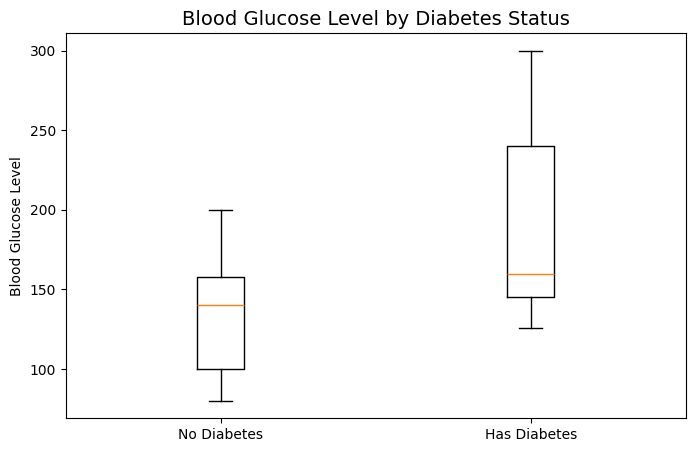

No Diabetes - Avg Glucose: 132.9
Has Diabetes - Avg Glucose: 194.1


In [51]:
# Blood glucose level by diabetes status
plt.figure(figsize=(8, 5))

no_diabetes_glucose = diabetes_df[diabetes_df['diabetes'] == 0]['blood_glucose_level']
has_diabetes_glucose = diabetes_df[diabetes_df['diabetes'] == 1]['blood_glucose_level']

plt.boxplot([no_diabetes_glucose, has_diabetes_glucose], labels=['No Diabetes', 'Has Diabetes'])
plt.title('Blood Glucose Level by Diabetes Status', fontsize=14)
plt.ylabel('Blood Glucose Level')
plt.show()

print(f"No Diabetes - Avg Glucose: {no_diabetes_glucose.mean():.1f}")
print(f"Has Diabetes - Avg Glucose: {has_diabetes_glucose.mean():.1f}")

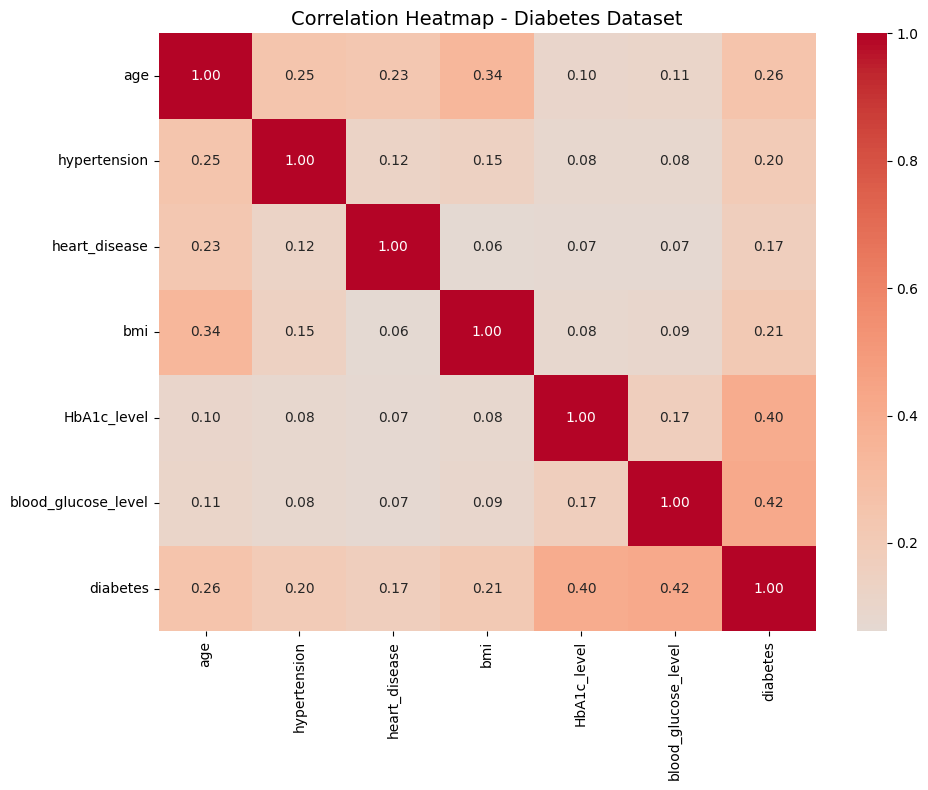

In [52]:
# Correlation heatmap for diabetes dataset
plt.figure(figsize=(10, 8))

numeric_cols_diabetes = diabetes_df.select_dtypes(include=[np.number]).columns
correlation_diabetes = diabetes_df[numeric_cols_diabetes].corr()

sns.heatmap(correlation_diabetes, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap - Diabetes Dataset', fontsize=14)
plt.tight_layout()
plt.show()

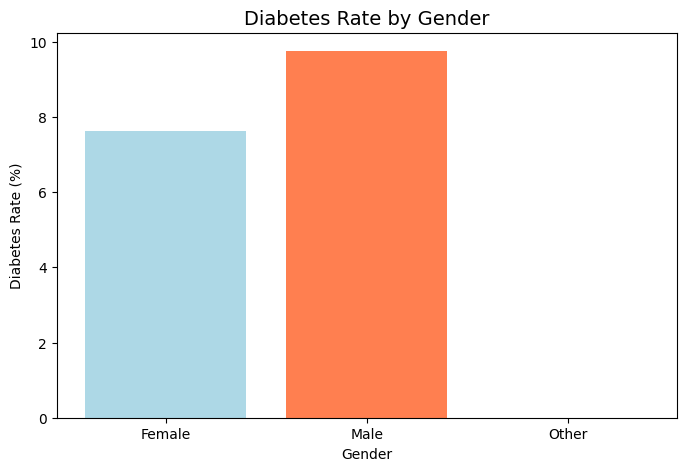

gender
Female    7.618869
Male      9.748974
Other     0.000000
Name: diabetes, dtype: float64


In [53]:
# Diabetes rate by gender
plt.figure(figsize=(8, 5))

gender_diabetes = diabetes_df.groupby('gender')['diabetes'].mean() * 100

plt.bar(gender_diabetes.index, gender_diabetes.values, color=['lightblue', 'coral'])
plt.title('Diabetes Rate by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Diabetes Rate (%)')
plt.show()

print(gender_diabetes)

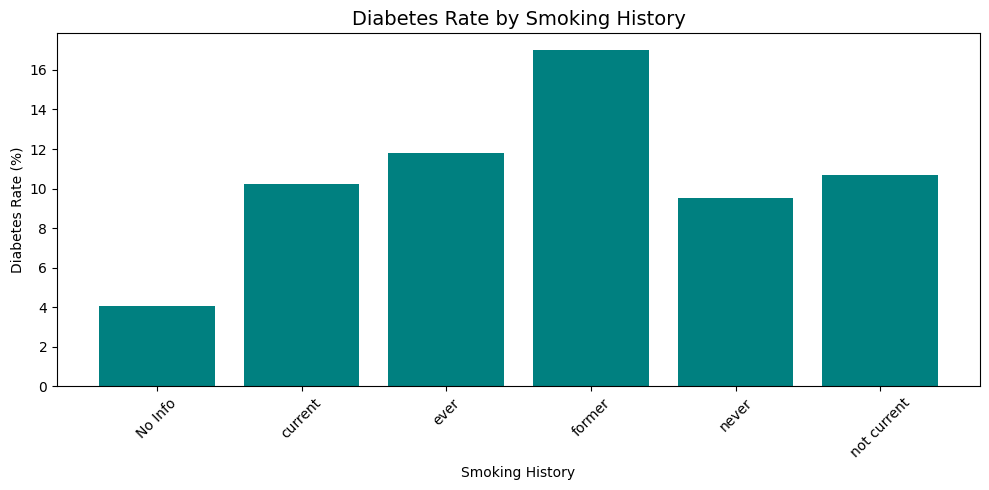

smoking_history
former         17.001711
ever           11.788212
not current    10.702652
current        10.208917
never           9.534122
No Info         4.059638
Name: diabetes, dtype: float64


In [54]:
# Diabetes rate by smoking history
plt.figure(figsize=(10, 5))

smoking_diabetes = diabetes_df.groupby('smoking_history')['diabetes'].mean() * 100

plt.bar(smoking_diabetes.index, smoking_diabetes.values, color='teal')
plt.title('Diabetes Rate by Smoking History', fontsize=14)
plt.xlabel('Smoking History')
plt.ylabel('Diabetes Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(smoking_diabetes.sort_values(ascending=False))

In [55]:
# Summary of key findings
print("=" * 50)
print("📊 EDA SUMMARY - KEY FINDINGS")
print("=" * 50)

print("\n🫀 HEART DATASET:")
print(f"   Total Patients: {len(heart_df)}")
print(f"   Age Range: {heart_df['age'].min()} - {heart_df['age'].max()}")
print(f"   Heart Disease Rate: {(heart_df['num'] > 0).mean() * 100:.1f}%")

print("\n🩺 DIABETES DATASET:")
print(f"   Total Patients: {len(diabetes_df)}")
print(f"   Age Range: {diabetes_df['age'].min()} - {diabetes_df['age'].max()}")
print(f"   Diabetes Rate: {diabetes_df['diabetes'].mean() * 100:.1f}%")

print("\n📈 KEY CORRELATIONS (Diabetes):")
diabetes_corr = diabetes_df.select_dtypes(include=[np.number]).corr()['diabetes'].sort_values(ascending=False)
print(diabetes_corr)

📊 EDA SUMMARY - KEY FINDINGS

🫀 HEART DATASET:
   Total Patients: 920
   Age Range: 28 - 77
   Heart Disease Rate: 55.3%

🩺 DIABETES DATASET:
   Total Patients: 100000
   Age Range: 0.08 - 80.0
   Diabetes Rate: 8.5%

📈 KEY CORRELATIONS (Diabetes):
diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64


In [56]:
# Save EDA summary to a text file
summary = """
EDA SUMMARY - Healthcare Diagnosis AI Project
=============================================

HEART DATASET:
- Total Patients: 920
- 16 columns including age, sex, cholesterol, blood pressure
- Target: 'num' (0 = healthy, 1-4 = disease severity)
- Data Quality Issue: sex column has mixed formats (Male/Female AND 0/1)
- Missing Values: Some cholesterol values are 0 (missing)

DIABETES DATASET:
- Total Patients: 100,000
- 9 columns including age, bmi, blood glucose, smoking history
- Target: 'diabetes' (0 = no, 1 = yes)
- Key Features: blood_glucose_level, HbA1c_level, bmi strongly correlated with diabetes

NEXT STEPS:
1. Feature Engineering - clean data, create new features
2. Train XGBoost model on tabular data
3. Train CNN on X-ray images
"""

with open('../outputs/reports/eda_summary.txt', 'w') as f:
    f.write(summary)

print("✅ EDA Summary saved to outputs/reports/eda_summary.txt")

✅ EDA Summary saved to outputs/reports/eda_summary.txt
